In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openslide import OpenSlide
from tiatoolbox.wsicore.wsireader import WSIReader

pd.set_option('display.max_rows', 6)

In [2]:
path_wsis_base = '/home/u2271662/tia/projects/acrobat-2023/data/val/wsi'
path_df = '/home/u2271662/tia/projects/acrobat-2023/data/val/acrobat_validation_points_public_1_of_1.csv'
reg_out_folder = '/home/u2271662/tia/projects/acrobat-2023/data/val/reg-output-20-08-23-01'

level = 1
size = 600

In [3]:
df = pd.read_csv(path_df)
df = df.sort_values(by=['anon_id'])
df

,Unnamed: 0,anon_id,anon_filename_he,anon_filename_ihc,point_id,ihc_x,ihc_y,mpp_ihc_10X,mpp_he_10X,ihc_antibody,he_x,he_y
3618,3618,0,0_HE_val.ndpi,0_KI67_val.ndpi,0_50,39285.411991,3801.189713,0.907338,0.907338,KI67,NaN,NaN
3572,3572,0,0_HE_val.ndpi,0_KI67_val.ndpi,0_4,27513.790177,12807.907628,0.907338,0.907338,KI67,NaN,NaN
3573,3573,0,0_HE_val.ndpi,0_KI67_val.ndpi,0_5,26225.541083,12992.854188,0.907338,0.907338,KI67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,1047,99,99_HE_val.ndpi,99_PGR_val.ndpi,99_29,32262.250277,8258.542587,0.910954,0.910954,PGR,NaN,NaN
1049,1049,99,99_HE_val.ndpi,99_PGR_val.ndpi,99_31,29103.477320,5268.833532,0.910954,0.910954,PGR,NaN,NaN
1031,1031,99,99_HE_val.ndpi,99_PGR_val.ndpi,99_13,30966.927335,7574.870523,0.910954,0.910954,PGR,NaN,NaN


In [4]:
# Get all csv files in registered landmarks folder named 'registered_landmarks.csv' and fill in he_x and he_y columns in df
for idx, row in df.iterrows():
    anon_id = row['anon_id']
    point_id = row['point_id']
    # print(f"Processing {anon_id} {point_id}")
    _registered_landmarks_path = os.path.join(reg_out_folder, str(anon_id))
    registered_landmarks_path = os.path.join(_registered_landmarks_path, 'registered_landmarks.csv')
    # Check if file exists and if not, skip
    if not os.path.exists(registered_landmarks_path):
        continue
    registered_landmarks_df = pd.read_csv(registered_landmarks_path)
    he_x = registered_landmarks_df.loc[registered_landmarks_df['point_id'] == point_id]['he_x'].values[0]
    he_y = registered_landmarks_df.loc[registered_landmarks_df['point_id'] == point_id]['he_y'].values[0]
    df.loc[(df['anon_id'] == anon_id) & (df['point_id'] == point_id), 'he_x'] = he_x
    df.loc[(df['anon_id'] == anon_id) & (df['point_id'] == point_id), 'he_y'] = he_y
df

,Unnamed: 0,anon_id,anon_filename_he,anon_filename_ihc,point_id,ihc_x,ihc_y,mpp_ihc_10X,mpp_he_10X,ihc_antibody,he_x,he_y
3618,3618,0,0_HE_val.ndpi,0_KI67_val.ndpi,0_50,39285.411991,3801.189713,0.907338,0.907338,KI67,28295.963842,4204.071542
3572,3572,0,0_HE_val.ndpi,0_KI67_val.ndpi,0_4,27513.790177,12807.907628,0.907338,0.907338,KI67,15139.179261,11029.836497
3573,3573,0,0_HE_val.ndpi,0_KI67_val.ndpi,0_5,26225.541083,12992.854188,0.907338,0.907338,KI67,13838.385932,10988.271196
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,1047,99,99_HE_val.ndpi,99_PGR_val.ndpi,99_29,32262.250277,8258.542587,0.910954,0.910954,PGR,32262.250277,8258.542587
1049,1049,99,99_HE_val.ndpi,99_PGR_val.ndpi,99_31,29103.477320,5268.833532,0.910954,0.910954,PGR,29103.477320,5268.833532
1031,1031,99,99_HE_val.ndpi,99_PGR_val.ndpi,99_13,30966.927335,7574.870523,0.910954,0.910954,PGR,30966.927335,7574.870523


0_KI67_val.ndpi
42697 3589


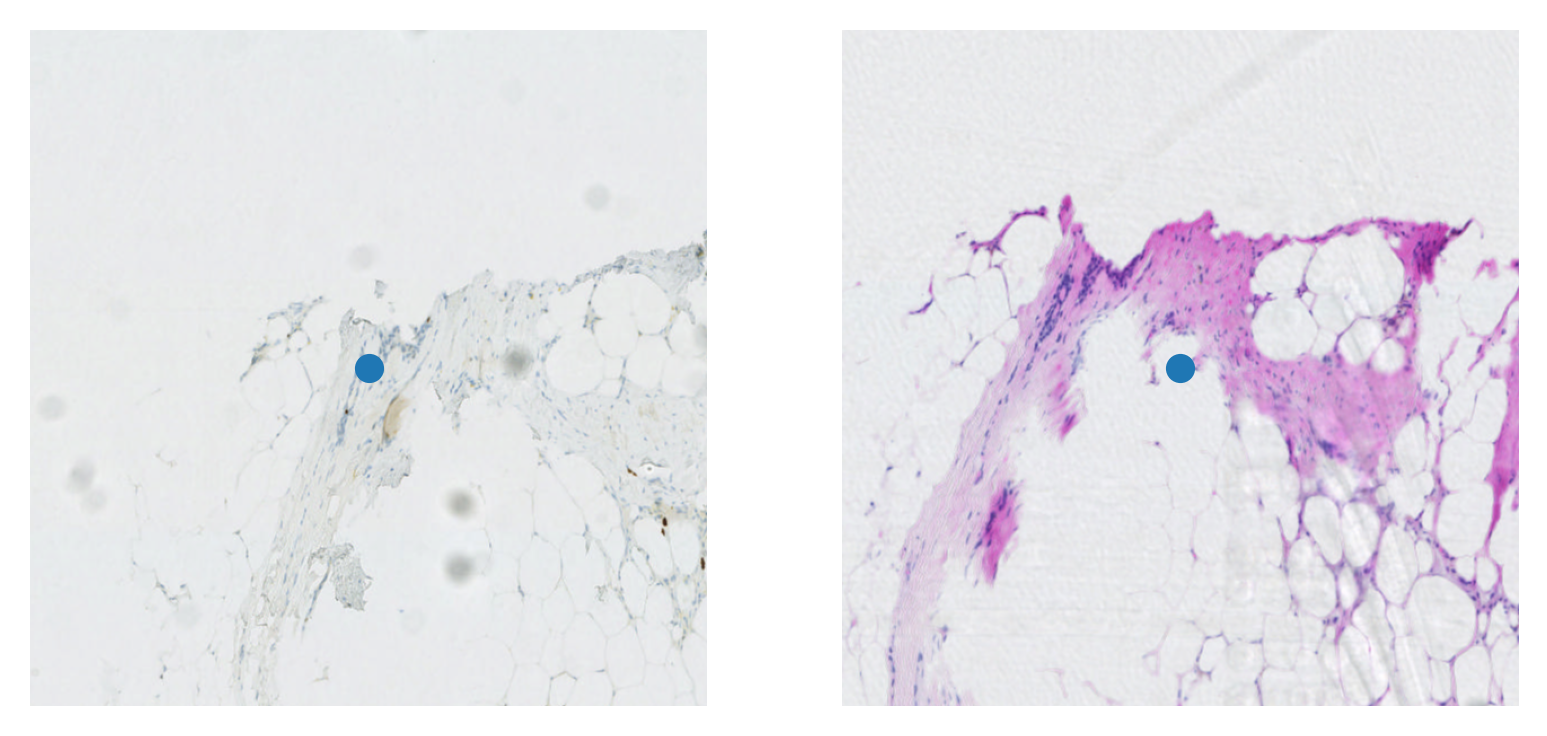

In [5]:
for i in range(1):
    
    # Get first row of the dataframe (not random)
    row = df.iloc[i]
    
    print(row['anon_filename_ihc'])
    path_ihc = os.path.join(path_wsis_base, os.path.splitext(row['anon_filename_ihc'])[0] + '.tiff')
    ihc_x = int(row['ihc_x']/(row['mpp_ihc_10X']) - size*2**level/2)
    ihc_y = int(row['ihc_y']/(row['mpp_ihc_10X']) - size*2**level/2)
    print(ihc_x, ihc_y)
    wsi_ihc = OpenSlide(path_ihc)
    img_ihc = wsi_ihc.read_region((ihc_x, ihc_y), level, (size, size))    
    
    if (not pd.isnull(row['he_x'])) & (not pd.isnull(row['he_y'])):
        path_he = os.path.join(path_wsis_base, os.path.splitext(row['anon_filename_he'])[0] + '.tiff')
        he_x = int(row['he_x']/(row['mpp_he_10X']) - size*2**level/2)
        he_y = int(row['he_y']/(row['mpp_he_10X']) - size*2**level/2)
        wsi_he = OpenSlide(path_he)
        img_he = wsi_he.read_region((he_x, he_y), level, (size, size))

        fig, axs = plt.subplots(1,2, dpi=300)
        ax = plt.subplot(121)
        ax.imshow(img_ihc)
        ax.scatter(int(size/2), int(size/2))
        plt.axis('off')
        ax = plt.subplot(122)
        ax.imshow(img_he)
        ax.scatter(int(size/2), int(size/2))
        plt.axis('off')
        plt.show()
    else:
        fig, axs = plt.subplots(1,2, dpi=300)
        ax = plt.subplot(121)
        ax.imshow(img_ihc)
        ax.scatter(int(size/2), int(size/2))
        plt.axis('off')
        ax = plt.subplot(122)
        ax.imshow(np.zeros(img_ihc.size))
        plt.axis('off')
        plt.show()

In [30]:
# Get all rows with specific anon_id
anon_id = 2
subset = df.loc[df['anon_id'] == anon_id]
subset

,Unnamed: 0,anon_id,anon_filename_he,anon_filename_ihc,point_id,ihc_x,ihc_y,mpp_ihc_10X,mpp_he_10X,ihc_antibody,he_x,he_y
4340,4340,2,2_HE_val.ndpi,2_ER_val.ndpi,2_21,22046.489673,14814.020545,0.910954,0.910954,ER,22046.489673,14814.020545
4319,4319,2,2_HE_val.ndpi,2_ER_val.ndpi,2_0,23302.627281,14696.187478,0.910954,0.910954,ER,23302.627281,14696.187478
4322,4322,2,2_HE_val.ndpi,2_ER_val.ndpi,2_3,23551.676563,12182.173142,0.910954,0.910954,ER,23551.676563,12182.173142
...,...,...,...,...,...,...,...,...,...,...,...,...
4358,4358,2,2_HE_val.ndpi,2_ER_val.ndpi,2_39,20692.306174,11218.920783,0.910954,0.910954,ER,20692.306174,11218.920783
4343,4343,2,2_HE_val.ndpi,2_ER_val.ndpi,2_24,17318.764591,15148.653771,0.910954,0.910954,ER,17318.764591,15148.653771
4321,4321,2,2_HE_val.ndpi,2_ER_val.ndpi,2_2,20507.531945,12362.353790,0.910954,0.910954,ER,20507.531945,12362.353790


|2023-08-21|15:07:34.058| [WARNING] Metadata: Falling back to TIFF resolution tag for microns-per-pixel (MPP).
|2023-08-21|15:07:34.060| [WARNING] Metadata: Objective power inferred from microns-per-pixel (MPP).
|2023-08-21|15:07:49.672| [WARNING] Metadata: Falling back to TIFF resolution tag for microns-per-pixel (MPP).
|2023-08-21|15:07:49.674| [WARNING] Metadata: Objective power inferred from microns-per-pixel (MPP).


(13888, 27648, 3)
(11648, 17408, 3)


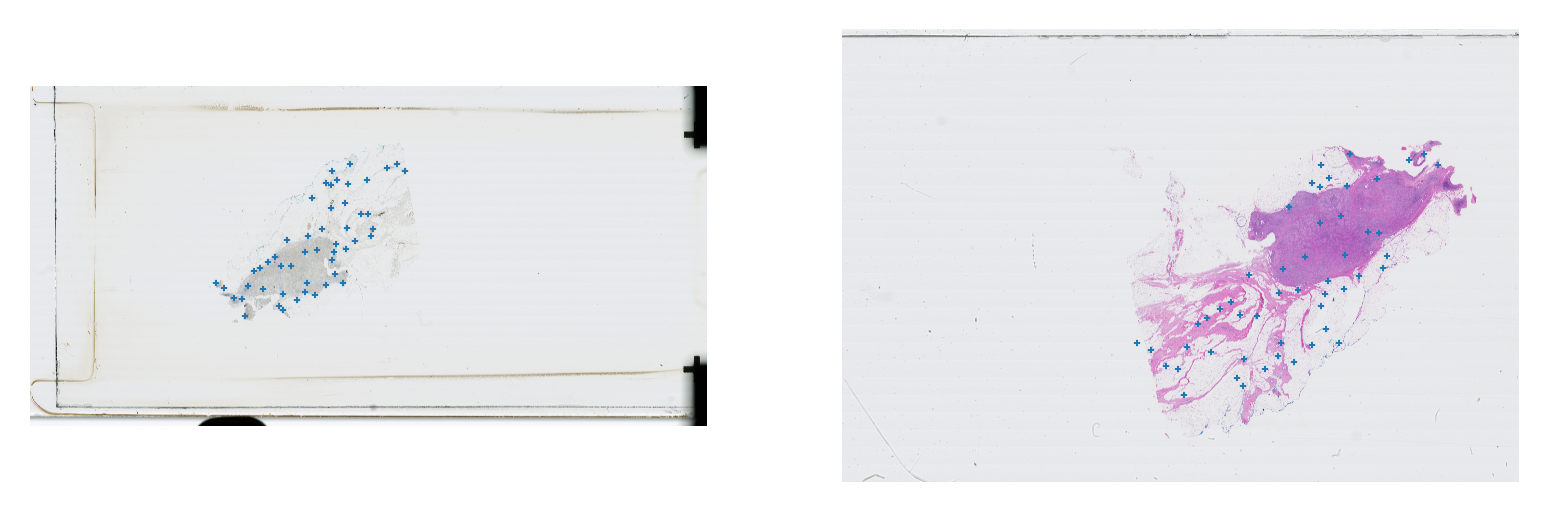

: 

In [63]:
ihc_landmarks = []
he_landmarks = []

path_ihc = os.path.join(path_wsis_base, os.path.splitext(subset.iloc[0]['anon_filename_ihc'])[0] + '.tiff')
path_he = os.path.join(path_wsis_base, os.path.splitext(subset.iloc[0]['anon_filename_he'])[0] + '.tiff')
ihc_reader = WSIReader.open(path_ihc)
he_reader = WSIReader.open(path_he)

marker_size = 0.25
level = 1
ihc_img = ihc_reader.slide_thumbnail(resolution=level, units='level')
he_img = he_reader.slide_thumbnail(resolution=level, units='level')

# Get size of ihc image
ihc_size = ihc_img.shape
he_size = he_img.shape
print(ihc_size)
print(he_size)

scale_factor = 2**level
for i in range(0, len(subset)):
    row = subset.iloc[i]
    ihc_x = int(row['ihc_x']/(row['mpp_ihc_10X'] * scale_factor))
    ihc_y = int(row['ihc_y']/(row['mpp_ihc_10X'] * scale_factor))
    he_x = int(row['he_x']/(row['mpp_he_10X'] * scale_factor))
    he_y = int(row['he_y']/(row['mpp_he_10X'] * scale_factor))
    
    ihc_landmarks.append((ihc_x, ihc_y))
    he_landmarks.append((he_x, he_y))

fig, axs = plt.subplots(1,2, dpi=300)
ax = plt.subplot(121)
ax.imshow(ihc_img)
ax.scatter([x[0] for x in ihc_landmarks], [x[1] for x in ihc_landmarks], s=marker_size, marker="+")
plt.axis('off')
ax = plt.subplot(122)
ax.imshow(he_img)
ax.scatter([x[0] for x in he_landmarks], [x[1] for x in he_landmarks], s=marker_size, marker="+")
plt.axis('off')
plt.show()
# Save plot as photo
# fig.savefig('landmarks.png', bbox_inches='tight', pad_inches=0)

(11110, 22118, 3) (9318, 13926, 3)


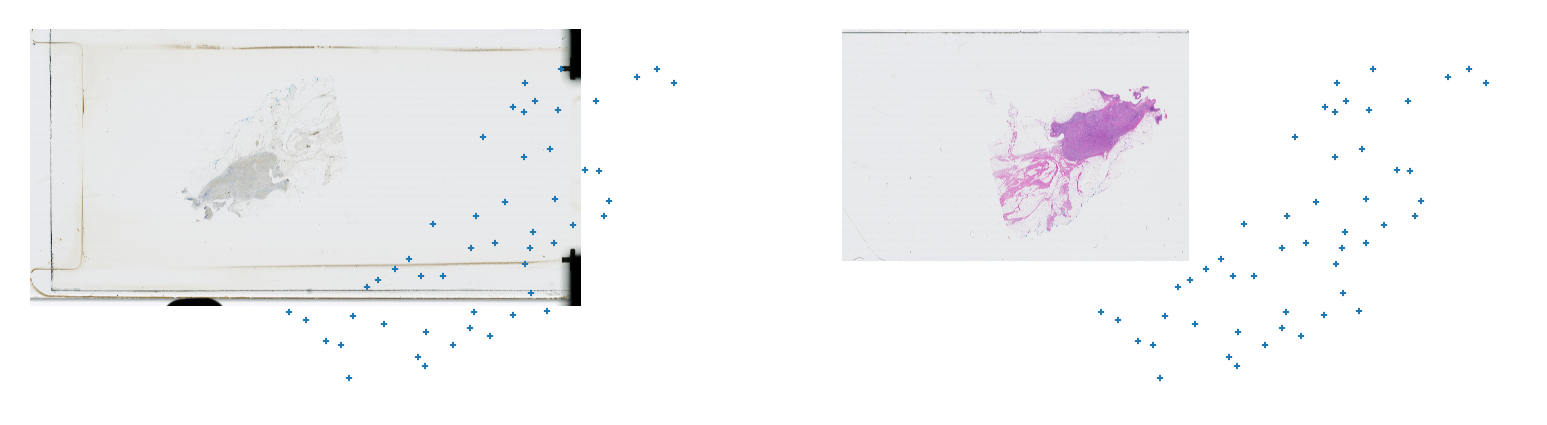